In [1]:
import json
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import os
import random
import numpy as np

# 0. Leemos los datos

In [2]:
def read_json(path):
    with open(path) as f:
        data = json.load(f)
    return data

def leer_k_archivos_json(k):
    archivos_json = [archivo for archivo in os.listdir("data") if archivo.endswith('.json')]
    paths = random.choices(archivos_json, k=k)

    all_playlists = []
    for p in paths:
        data = read_json(f"data\{p}")
        playlist = pd.DataFrame(data['playlists'])
        all_playlists.append(playlist)
    
    playlists = pd.concat(all_playlists, ignore_index=True)
    return playlists

In [3]:
playlists = leer_k_archivos_json(10)
playlists.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,idk,false,415000,1508803200,31,30,1,"[{'pos': 0, 'artist_name': 'will.i.am', 'track...",24,6875295,22,NaN
1,Workout,false,415001,1427068800,25,25,1,"[{'pos': 0, 'artist_name': 'Eminem', 'track_ur...",11,5984938,25,NaN
2,Electronic,false,415002,1462924800,59,35,3,"[{'pos': 0, 'artist_name': 'M83', 'track_uri':...",14,16766200,20,NaN
3,feels,false,415003,1502755200,68,58,1,"[{'pos': 0, 'artist_name': 'Monte Booker', 'tr...",2,16127070,42,NaN
4,Sleep,false,415004,1489449600,12,4,1,"[{'pos': 0, 'artist_name': 'Jason Falkner', 't...",2,2818062,4,NaN


In [4]:
def expandir_tracks(playli):
    expanded_tracks_df = pd.DataFrame()

    # Iterar sobre cada fila y expandir los datos JSON en un dataframe
    for _, row in playli.iterrows():
        # Cargar el JSON desde la columna 'tracks'
        tracks = row['tracks']
        
        # Comprobar si 'tracks' es una cadena que necesita ser convertida de JSON
        if isinstance(tracks, str):
            try:
                tracks = json.loads(tracks)  # Cargar la cadena JSON
            except json.JSONDecodeError:
                tracks = []  # En caso de error, usar una lista vacía
        elif not isinstance(tracks, list):
            tracks = []  # Asegurar que tracks sea una lista si no es una cadena

        if tracks:
            track_data = json_normalize(tracks)
            track_data['pid'] = row['pid']  # añadimos el id de la playlist para mantener la referencia
            expanded_tracks_df = pd.concat([expanded_tracks_df, track_data], ignore_index=True)
    return expanded_tracks_df

In [5]:
expanded_tracks_df = expandir_tracks(playlists)

In [6]:
#verificamos que no existen valores nan
expanded_tracks_df.isna().sum()

pos            0
artist_name    0
track_uri      0
artist_uri     0
track_name     0
album_uri      0
duration_ms    0
album_name     0
pid            0
dtype: int64

In [7]:
# verificamos que no existen duplicados
expanded_tracks_df.duplicated().sum()

0

In [8]:
playlists.drop("tracks", axis=1, inplace=True)
playlists.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists,description
0,idk,false,415000,1508803200,31,30,1,24,6875295,22,NaN
1,Workout,false,415001,1427068800,25,25,1,11,5984938,25,NaN
2,Electronic,false,415002,1462924800,59,35,3,14,16766200,20,NaN
3,feels,false,415003,1502755200,68,58,1,2,16127070,42,NaN
4,Sleep,false,415004,1489449600,12,4,1,2,2818062,4,NaN


In [9]:
playlists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           10000 non-null  object
 1   collaborative  10000 non-null  object
 2   pid            10000 non-null  int64 
 3   modified_at    10000 non-null  int64 
 4   num_tracks     10000 non-null  int64 
 5   num_albums     10000 non-null  int64 
 6   num_followers  10000 non-null  int64 
 7   num_edits      10000 non-null  int64 
 8   duration_ms    10000 non-null  int64 
 9   num_artists    10000 non-null  int64 
 10  description    199 non-null    object
dtypes: int64(8), object(3)
memory usage: 859.5+ KB


In [10]:
expanded_tracks_df.head()

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,pid
0,0,will.i.am,spotify:track:0nAQSPlqQ89ok7g2uzfHgy,spotify:artist:085pc2PYOi8bGKj0PNjekA,Feelin' Myself,spotify:album:6H7mXPXFFDOpby7Xcke1vh,253546,#willpower,415000
1,1,Chris Brown,spotify:track:2bEvCSQQha48I5ZQUCvLzP,spotify:artist:7bXgB6jMjp9ATFy66eO08Z,Love More,spotify:album:4yOWnTrCkOOpl4IiVnpj3H,189640,X (Deluxe Version),415000
2,2,Rae Sremmurd,spotify:track:6mapJIPnQ23RTAevUoE0DL,spotify:artist:7iZtZyCzp3LItcw1wtPI3D,Swang,spotify:album:5v6iBhIlflzR9rEd1LAMbd,208120,SremmLife 2,415000
3,3,Juicy J,spotify:track:3N5oiETJEStSB71TjTFkWV,spotify:artist:5gCRApTajqwbnHHPbr2Fpi,Bounce It,spotify:album:7h1ut6IUbndKY7QrqcbAND,260560,Stay Trippy,415000
4,4,Waka Flocka Flame,spotify:track:0zHTrELBtYCagE8KKIIaZk,spotify:artist:6f4XkbvYlXMH0QgVRzW0sM,Bricksquad - feat. Gudda Gudda [Explicit Album...,spotify:album:6MQtWELG7aRX7CkAzQ6nLM,237346,Flockaveli,415000


In [11]:
if (len(expanded_tracks_df["track_uri"].unique()) != len(expanded_tracks_df["track_name"].unique())):
    print("Existen canciones con el mismo nombre pero diferente URL")

Existen canciones con el mismo nombre pero diferente URL


Por lo anterior, usamos el URL para agrupar las canciones

In [12]:
expanded_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661091 entries, 0 to 661090
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   pos          661091 non-null  int64 
 1   artist_name  661091 non-null  object
 2   track_uri    661091 non-null  object
 3   artist_uri   661091 non-null  object
 4   track_name   661091 non-null  object
 5   album_uri    661091 non-null  object
 6   duration_ms  661091 non-null  int64 
 7   album_name   661091 non-null  object
 8   pid          661091 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 45.4+ MB


# 1. Analisis Exploratorio

In [13]:
playlists

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists,description
0,idk,false,415000,1508803200,31,30,1,24,6875295,22,NaN
1,Workout,false,415001,1427068800,25,25,1,11,5984938,25,NaN
2,Electronic,false,415002,1462924800,59,35,3,14,16766200,20,NaN
3,feels,false,415003,1502755200,68,58,1,2,16127070,42,NaN
4,Sleep,false,415004,1489449600,12,4,1,2,2818062,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9995,Throwbacks,false,919995,1453593600,44,36,1,2,8634635,23,NaN
9996,New Music,false,919996,1459209600,31,30,1,3,6936784,30,NaN
9997,My Music,false,919997,1438300800,101,27,1,23,24489581,23,NaN
9998,fav songs,false,919998,1493942400,113,82,1,78,26020571,52,NaN


In [14]:
expanded_tracks_df

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,pid
0,0,will.i.am,spotify:track:0nAQSPlqQ89ok7g2uzfHgy,spotify:artist:085pc2PYOi8bGKj0PNjekA,Feelin' Myself,spotify:album:6H7mXPXFFDOpby7Xcke1vh,253546,#willpower,415000
1,1,Chris Brown,spotify:track:2bEvCSQQha48I5ZQUCvLzP,spotify:artist:7bXgB6jMjp9ATFy66eO08Z,Love More,spotify:album:4yOWnTrCkOOpl4IiVnpj3H,189640,X (Deluxe Version),415000
2,2,Rae Sremmurd,spotify:track:6mapJIPnQ23RTAevUoE0DL,spotify:artist:7iZtZyCzp3LItcw1wtPI3D,Swang,spotify:album:5v6iBhIlflzR9rEd1LAMbd,208120,SremmLife 2,415000
3,3,Juicy J,spotify:track:3N5oiETJEStSB71TjTFkWV,spotify:artist:5gCRApTajqwbnHHPbr2Fpi,Bounce It,spotify:album:7h1ut6IUbndKY7QrqcbAND,260560,Stay Trippy,415000
4,4,Waka Flocka Flame,spotify:track:0zHTrELBtYCagE8KKIIaZk,spotify:artist:6f4XkbvYlXMH0QgVRzW0sM,Bricksquad - feat. Gudda Gudda [Explicit Album...,spotify:album:6MQtWELG7aRX7CkAzQ6nLM,237346,Flockaveli,415000
...,...,...,...,...,...,...,...,...,...
661086,73,Shakira,spotify:track:53omHAZC5Onf7gLzSOOtMP,spotify:artist:0EmeFodog0BfCgMzAIvKQp,Ojos Así,spotify:album:3JhHRFetUgAWw376a3sk6C,237533,Grandes Exitos,919999
661087,74,Margarita la diosa de la cumbia,spotify:track:7yMz7lQoYlWUTjy825IrnN,spotify:artist:2vdi5RS6XV5Qy7J5GgDqgn,No Te Pido Flores,spotify:album:0qU5mSXy2CWSEKzAH6O9Ae,252493,Tentaciones,919999
661088,75,Ana Bárbara,spotify:track:7ceiXwNZ2DwNIJ54tsJwRY,spotify:artist:43qxAkuKFB6fMNSeS5dO7Z,Lo Busqué,spotify:album:2eyl66bHPrqMjjTfzLxHt3,275893,Loca De Amar,919999
661089,76,Don Omar,spotify:track:2a1o6ZejUi8U3wzzOtCOYw,spotify:artist:33ScadVnbm2X8kkUqOkC6Z,Danza Kuduro,spotify:album:6mGDfbDErYIJsmSewvccWm,198773,Meet The Orphans,919999


In [15]:
by_playlist = expanded_tracks_df.groupby('pid').agg(
    num_songs=('track_name', 'count'),  # Contamos el número de canciones por playlist
    avg_duration=('duration_ms', 'mean'),  # Calculamos la duración media de las canciones
    artists=('artist_name', lambda x: set(x)),  # Obtenemos un conjunto de artistas únicos
    songs =('track_uri', lambda x: set(x)),  # Obtenemos un conjunto de caciones únicas
    albums =('album_name', lambda x: set(x))  # Obtenemos un conjunto de albumes únicos
)

by_playlist['avg_duration'] = by_playlist['avg_duration'] / 60000 # Convertimos la duración de milisegundos a minutos
by_playlist.head()

,num_songs,avg_duration,artists,songs,albums
pid,,,,,
18000,83,3.672590,"{Avril Lavigne, DJ Snake, Breathe Carolina, Th...","{spotify:track:4yIYUPqBGy7imJussAOoYz, spotify...","{Avril Lavigne, Borderline, Tremor (Sensation ..."
18001,12,3.539308,"{David Bisbal, Yandel, Enrique Iglesias, Juan ...","{spotify:track:0SdmqDCyKpv5rnEcX53hCB, spotify...","{Tú Y Yo, The King Is Back, De Líder a Leyenda..."
18002,9,3.505522,"{Ace of Base, Star Darlings, China Anne McClai...","{spotify:track:6kWJvPfC4DgUpRsXKNa9z9, spotify...","{Wish Now, The Very Best Of, Descendants, Love..."
18003,33,3.652105,"{OneRepublic, Portugal. The Man, A R I Z O N A...","{spotify:track:15dnkAHcHC0vrIUlbiPiqU, spotify...","{Awake, Look What You Made Me Do, Traveler: Th..."
18004,59,4.004167,"{The Glitch Mob, Kim Walker-Smith, NF, Elektro...","{spotify:track:7qCAVkHWZkF44OzOUKf8Cr, spotify...","{Heroes for Sale, Glory & Wonder, Below Paradi..."


In [16]:
by_playlist.describe()   

,num_songs,avg_duration
count,10000.000000,10000.000000
mean,66.109100,3.921193
std,53.379138,0.568052
min,5.000000,1.191156
25%,26.000000,3.657929
50%,49.000000,3.854124
75%,92.000000,4.093350
max,250.000000,19.711812


In [17]:
by_playlist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 18000 to 919999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_songs     10000 non-null  int64  
 1   avg_duration  10000 non-null  float64
 2   artists       10000 non-null  object 
 3   songs         10000 non-null  object 
 4   albums        10000 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 468.8+ KB


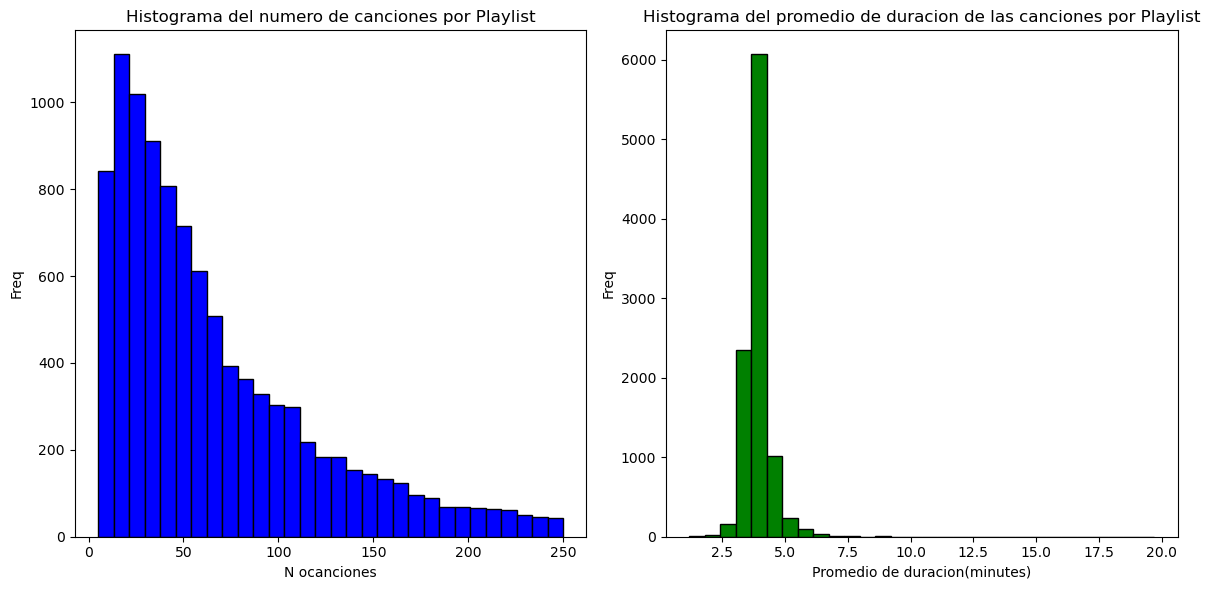

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Primer subplot para 'num_songs'
ax1.hist(by_playlist['num_songs'], bins=30, color='blue', edgecolor='black')
ax1.set_title('Histograma del numero de canciones por Playlist')
ax1.set_xlabel('N ocanciones')
ax1.set_ylabel('Freq')

# Segundo subplot para 'avg_duration'
ax2.hist(by_playlist['avg_duration'], bins=30, color='green', edgecolor='black')
ax2.set_title('Histograma del promedio de duracion de las canciones por Playlist')
ax2.set_xlabel('Promedio de duracion(minutes)')
ax2.set_ylabel('Freq')

# Ajustar el layout para evitar la superposición de elementos
plt.tight_layout()

# Mostrar la figura con ambos subplots
plt.show()

In [19]:
n_artists = len(expanded_tracks_df["artist_name"].unique())
n_albums = len(expanded_tracks_df["album_name"].unique())
n_songs = len(expanded_tracks_df["track_uri"].unique())

print(f"Número de artistas únicos: {n_artists}, Número de canciones únicas: {n_songs}, Número de albumes únicos: {n_albums}")

Número de artistas únicos: 36029, Número de canciones únicas: 174744, Número de albumes únicos: 70909


In [20]:
playlist_per_song = expanded_tracks_df.groupby('track_uri')['pid'].agg(list).reset_index()
playlist_per_song.head()

,track_uri,pid
0,spotify:track:000OMscDzUz5gjIIruXEWg,[851196]
1,spotify:track:000xQL6tZNLJzIrtIgxqSl,"[415150, 415204, 415632, 415694, 415801, 41587..."
2,spotify:track:000xYdQfIZ4pDmBGzQalKU,[566370]
3,spotify:track:0010mZpCCwlPwoBiBsjoac,"[493437, 493768, 18760, 851643]"
4,spotify:track:001Y8th0ItldCRfN3XrwRI,[298649]


- Pasamos los URL a un id de cancion

In [21]:
url_id = {}
n = 1

def key_exists(key, dictionary):
    try:
        value = dictionary[key]
        return True
    except KeyError:
        return False

def get_id(x, n):
    if not key_exists(x, url_id):
        url_id[x] = n
        n += 1
    return url_id[x], n

values = []

for val in playlist_per_song["track_uri"]:
    valu, n = get_id(val, n)
    values.append(valu)

playlist_per_song["track_id"] = values
playlist_per_song.head()

,track_uri,pid,track_id
0,spotify:track:000OMscDzUz5gjIIruXEWg,[851196],1
1,spotify:track:000xQL6tZNLJzIrtIgxqSl,"[415150, 415204, 415632, 415694, 415801, 41587...",2
2,spotify:track:000xYdQfIZ4pDmBGzQalKU,[566370],3
3,spotify:track:0010mZpCCwlPwoBiBsjoac,"[493437, 493768, 18760, 851643]",4
4,spotify:track:001Y8th0ItldCRfN3XrwRI,[298649],5


In [24]:
expanded_tracks_df["track_id"] = expanded_tracks_df["track_uri"].apply(lambda x: url_id[x])

In [25]:
expanded_tracks_df

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,pid,track_id
0,0,will.i.am,spotify:track:0nAQSPlqQ89ok7g2uzfHgy,spotify:artist:085pc2PYOi8bGKj0PNjekA,Feelin' Myself,spotify:album:6H7mXPXFFDOpby7Xcke1vh,253546,#willpower,415000,17833
1,1,Chris Brown,spotify:track:2bEvCSQQha48I5ZQUCvLzP,spotify:artist:7bXgB6jMjp9ATFy66eO08Z,Love More,spotify:album:4yOWnTrCkOOpl4IiVnpj3H,189640,X (Deluxe Version),415000,58366
2,2,Rae Sremmurd,spotify:track:6mapJIPnQ23RTAevUoE0DL,spotify:artist:7iZtZyCzp3LItcw1wtPI3D,Swang,spotify:album:5v6iBhIlflzR9rEd1LAMbd,208120,SremmLife 2,415000,152145
3,3,Juicy J,spotify:track:3N5oiETJEStSB71TjTFkWV,spotify:artist:5gCRApTajqwbnHHPbr2Fpi,Bounce It,spotify:album:7h1ut6IUbndKY7QrqcbAND,260560,Stay Trippy,415000,75569
4,4,Waka Flocka Flame,spotify:track:0zHTrELBtYCagE8KKIIaZk,spotify:artist:6f4XkbvYlXMH0QgVRzW0sM,Bricksquad - feat. Gudda Gudda [Explicit Album...,spotify:album:6MQtWELG7aRX7CkAzQ6nLM,237346,Flockaveli,415000,22272
...,...,...,...,...,...,...,...,...,...,...
661086,73,Shakira,spotify:track:53omHAZC5Onf7gLzSOOtMP,spotify:artist:0EmeFodog0BfCgMzAIvKQp,Ojos Así,spotify:album:3JhHRFetUgAWw376a3sk6C,237533,Grandes Exitos,919999,113556
661087,74,Margarita la diosa de la cumbia,spotify:track:7yMz7lQoYlWUTjy825IrnN,spotify:artist:2vdi5RS6XV5Qy7J5GgDqgn,No Te Pido Flores,spotify:album:0qU5mSXy2CWSEKzAH6O9Ae,252493,Tentaciones,919999,174140
661088,75,Ana Bárbara,spotify:track:7ceiXwNZ2DwNIJ54tsJwRY,spotify:artist:43qxAkuKFB6fMNSeS5dO7Z,Lo Busqué,spotify:album:2eyl66bHPrqMjjTfzLxHt3,275893,Loca De Amar,919999,166341
661089,76,Don Omar,spotify:track:2a1o6ZejUi8U3wzzOtCOYw,spotify:artist:33ScadVnbm2X8kkUqOkC6Z,Danza Kuduro,spotify:album:6mGDfbDErYIJsmSewvccWm,198773,Meet The Orphans,919999,57917


In [26]:
by_playlist["track_id"] = by_playlist["songs"].apply(lambda x: [url_id[val] for val in list(x)])
by_playlist.head()

,num_songs,avg_duration,artists,songs,albums,track_id
pid,,,,,,
18000,83,3.672590,"{Avril Lavigne, DJ Snake, Breathe Carolina, Th...","{spotify:track:4yIYUPqBGy7imJussAOoYz, spotify...","{Avril Lavigne, Borderline, Tremor (Sensation ...","[111522, 37816, 100989, 120790, 47227, 139428,..."
18001,12,3.539308,"{David Bisbal, Yandel, Enrique Iglesias, Juan ...","{spotify:track:0SdmqDCyKpv5rnEcX53hCB, spotify...","{Tú Y Yo, The King Is Back, De Líder a Leyenda...","[10374, 21163, 68307, 115417, 59689, 167361, 1..."
18002,9,3.505522,"{Ace of Base, Star Darlings, China Anne McClai...","{spotify:track:6kWJvPfC4DgUpRsXKNa9z9, spotify...","{Wish Now, The Very Best Of, Descendants, Love...","[151347, 58428, 164608, 19985, 77918, 93717, 9..."
18003,33,3.652105,"{OneRepublic, Portugal. The Man, A R I Z O N A...","{spotify:track:15dnkAHcHC0vrIUlbiPiqU, spotify...","{Awake, Look What You Made Me Do, Traveler: Th...","[24559, 43336, 146272, 54386, 4526, 165530, 11..."
18004,59,4.004167,"{The Glitch Mob, Kim Walker-Smith, NF, Elektro...","{spotify:track:7qCAVkHWZkF44OzOUKf8Cr, spotify...","{Heroes for Sale, Glory & Wonder, Below Paradi...","[171226, 32305, 31823, 34328, 76584, 10284, 17..."


In [27]:
playlist_per_song['n_playlists'] = playlist_per_song['pid'].apply(lambda x: len(set(x)))

In [28]:
playlist_per_song["n_playlists"].mean()

3.7322425948816553

In [29]:
cancion_mas_reproducida = playlist_per_song["n_playlists"].idxmax()
playlist_per_song.iloc[cancion_mas_reproducida]

track_uri                   spotify:track:7KXjTSCq5nL1LoYtL7XAwS
pid            [415018, 415032, 415128, 415139, 415179, 41519...
track_id                                                  164449
n_playlists                                                  444
Name: 164448, dtype: object

In [30]:
playlist_per_song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174744 entries, 0 to 174743
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   track_uri    174744 non-null  object
 1   pid          174744 non-null  object
 2   track_id     174744 non-null  int64 
 3   n_playlists  174744 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 5.3+ MB


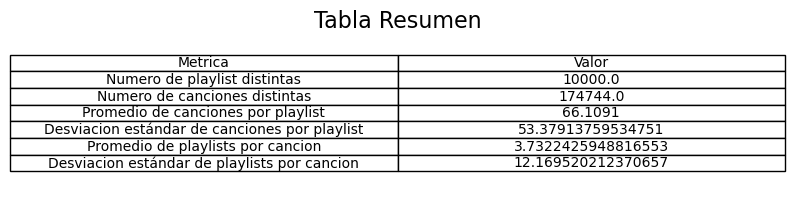

In [31]:
metricas = {
    'Metrica': ['Numero de playlist distintas', 'Numero de canciones distintas',
                'Promedio de canciones por playlist', 'Desviacion estándar de canciones por playlist',
                'Promedio de playlists por cancion', 'Desviacion estándar de playlists por cancion'],
    'Valor': [by_playlist.shape[0], n_songs, by_playlist["num_songs"].mean(), by_playlist["num_songs"].std(), 
              playlist_per_song["n_playlists"].mean(), playlist_per_song["n_playlists"].std()]
}

df = pd.DataFrame(metricas)

fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('off')
tabla = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colWidths=[0.5, 0.5])
plt.title('Tabla Resumen', fontsize=16)
plt.show()

# 2. Baseline

In [32]:
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares
from implicit.bpr import BayesianPersonalizedRanking
from implicit.evaluation import mean_average_precision_at_k, ndcg_at_k

c:\Users\jasar\anaconda3\envs\Recomendadores\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
#Hay playlist que tienen la misma cancion más de una vez, aca las tratamos solo una vez
playlist_track = expanded_tracks_df[["pid","track_id","track_name","duration_ms","artist_name"]].drop_duplicates()
playlist_track.head()

,pid,track_id,track_name,duration_ms,artist_name
0,415000,17833,Feelin' Myself,253546,will.i.am
1,415000,58366,Love More,189640,Chris Brown
2,415000,152145,Swang,208120,Rae Sremmurd
3,415000,75569,Bounce It,260560,Juicy J
4,415000,22272,Bricksquad - feat. Gudda Gudda [Explicit Album...,237346,Waka Flocka Flame


- Separamos en data de validación y data de entrenamiento

In [50]:
# elegimos el 60% de las playlist para entrenar el modelo
# Calcular el 60% del tamaño de la lista
num_elementos = int(0.6 * len(list(playlist_track["pid"].unique())))

pid_train = random.sample(list(playlist_track["pid"].unique()), num_elementos)

In [65]:
playlist_track_train = playlist_track[playlist_track['pid'].isin(pid_train)]
playlist_track_val = playlist_track[~playlist_track['pid'].isin(pid_train)]

In [66]:
playlist_track_train.shape[0] + playlist_track_val.shape[0] == playlist_track.shape[0]

True

In [67]:
from sklearn.preprocessing import LabelEncoder

label_encoder_customers = LabelEncoder()
playlist_id_encoded_train = label_encoder_customers.fit_transform(playlist_track_train['pid'])
playlist_id_encoded_val = label_encoder_customers.fit_transform(playlist_track_val['pid'])

label_encoder_articles = LabelEncoder()
song_id_encoded_train = label_encoder_articles.fit_transform(playlist_track_train['track_id'])
song_id_encoded_val = label_encoder_articles.fit_transform(playlist_track_val['track_id'])

interacciones_train = csr_matrix((np.ones(playlist_track_train.shape[0]), (playlist_id_encoded_train, song_id_encoded_train)))
interacciones_val = csr_matrix((np.ones(playlist_track_val.shape[0]), (playlist_id_encoded_val, song_id_encoded_val)))


def evaluar_als(dimension):
    modelo = AlternatingLeastSquares(factors=dimension)
    modelo.fit(interacciones_train)
    mapk = mean_average_precision_at_k(modelo, train_user_items=interacciones_train, test_user_items=interacciones_val, K=10)
    ndcgk = ndcg_at_k(modelo, train_user_items=interacciones_train, test_user_items=interacciones_val, K=10)
    return mapk, ndcgk

def evaluar_bpr(dimension):
    modelo = BayesianPersonalizedRanking(factors=dimension)
    modelo.fit(interacciones_train)
    mapk = mean_average_precision_at_k(modelo, train_user_items=interacciones_train, test_user_items=interacciones_val, K=10)
    ndcgk = ndcg_at_k(modelo, train_user_items=interacciones_train, test_user_items=interacciones_val, K=10)
    return mapk, ndcgk

In [68]:
dimensiones = [50, 100, 200, 500, 1000]

resultados_als = {}
resultados_bpr = {}

for dimension in dimensiones:
    mapk_als, ndcgk_als = evaluar_als(dimension)
    mapk_bpr, ndcgk_bpr = evaluar_bpr(dimension)

    resultados_als[dimension] = [mapk_als, ndcgk_als]
    resultados_bpr[dimension] = [mapk_bpr, ndcgk_bpr]

c:\Users\jasar\anaconda3\envs\Recomendadores\lib\site-packages\implicit\cpu\als.py:95: RuntimeWarning: Intel MKL BLAS is configured to use 4 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'MKL_NUM_THREADS=1' or by callng 'threadpoolctl.threadpool_limits(1, "blas")'. Having MKL use a threadpool can lead to severe performance issues
  check_blas_config()
100%|██████████| 4000/4000 [00:05<00:00, 709.35it/s]


In [74]:
resultados_als

{50: [0.0002463690476190476, 0.0007826986666425998],
 100: [0.0002233730158730159, 0.0007144236836064014],
 200: [0.000234484126984127, 0.0007265606650873348],
 500: [0.00022850198412698416, 0.000706043293816853],
 1000: [0.00020154761904761907, 0.0006624987525445549]}

In [70]:
resultados_bpr

{50: [0.000166765873015873, 0.0005363801617680262],
 100: [0.00013850198412698414, 0.00048573679776613105],
 200: [0.00012305555555555556, 0.0003705928795739429],
 500: [0.00012551587301587303, 0.00037910723695375425],
 1000: [0.00021340277777777777, 0.000654642519794359]}

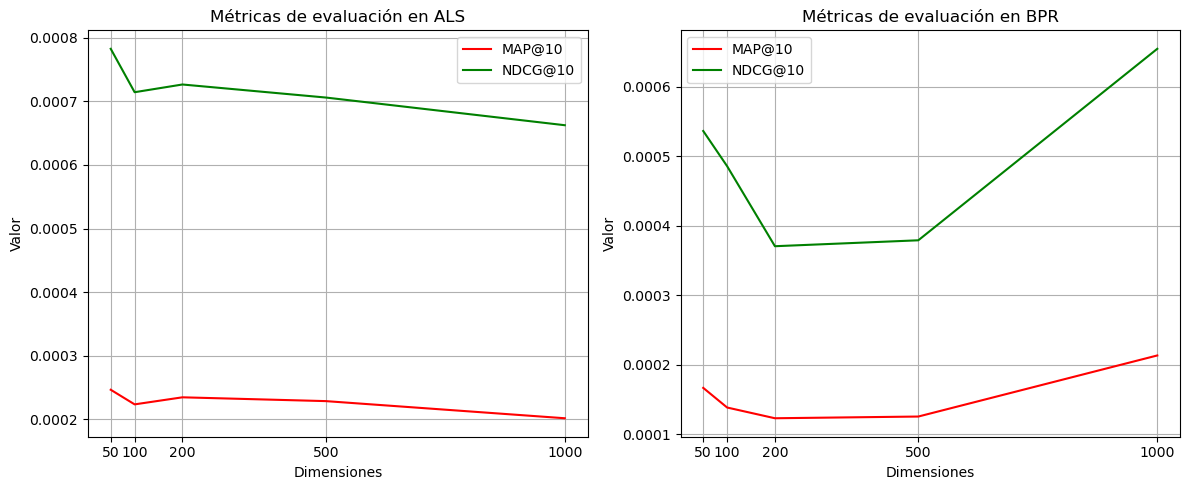

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Gráfico para ALS
axs[0].plot(dimensiones, [resultados_als[i][0] for i in dimensiones], label='MAP@10', color='red')
axs[0].plot(dimensiones, [resultados_als[i][1] for i in dimensiones], label='NDCG@10', color='green')
axs[0].set_title('Métricas de evaluación en ALS')
axs[0].set_xlabel('Dimensiones')
axs[0].set_ylabel('Valor')
axs[0].legend()
axs[0].set_xticks(dimensiones)
axs[0].grid(True)

# Gráfico para BPR
axs[1].plot(dimensiones, [resultados_bpr[i][0] for i in dimensiones], label='MAP@10', color='red')
axs[1].plot(dimensiones, [resultados_bpr[i][1] for i in dimensiones], label='NDCG@10', color='green')
axs[1].set_title('Métricas de evaluación en BPR')
axs[1].set_xlabel('Dimensiones')
axs[1].set_ylabel('Valor')
axs[1].legend()
axs[1].set_xticks(dimensiones)
axs[1].grid(True)

plt.tight_layout() 
plt.show()